In [1]:
# 偏差：数据样本内部的差异，通常会关注数据样本与某个指标的差异性，更注重差异的呈现

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 获取数据：订单数据
data = pd.read_excel('order2019.xlsx')
data.head()

,id,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
0,1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
1,2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
2,3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
3,4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
4,5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [6]:
res = data[['chanelID','payment']].groupby('chanelID').sum()
res

,payment
chanelID,
渠道-0007,9.544331e+06
渠道-0168,4.560486e+06
渠道-0191,3.849866e+06
渠道-0283,7.444815e+06
渠道-0318,3.450479e+06
渠道-0330,2.409767e+06
渠道-0396,9.738223e+06
渠道-0465,5.248341e+06
渠道-0530,1.451162e+07


In [7]:
# 3.6.1 发散型条形图：交易额差值排序

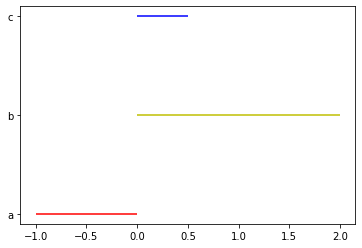

In [10]:
# 简单实例
plt.hlines(y=['a','b','c'],xmin=0,xmax=[-1,2,0.5],colors=['r','y','b'])

In [22]:
res = res.sort_values('payment',ascending=True)
res['colors'] = ['red' if x > 10000000 else 'green' for x in res['payment']]
res

,payment,colors
chanelID,,
渠道-0330,2.409767e+06,green
渠道-0318,3.450479e+06,green
渠道-0789,3.601731e+06,green
渠道-0191,3.849866e+06,green
渠道-0168,4.560486e+06,green
渠道-0568,5.082479e+06,green
渠道-0465,5.248341e+06,green
渠道-0985,7.124801e+06,green
渠道-0283,7.444815e+06,green


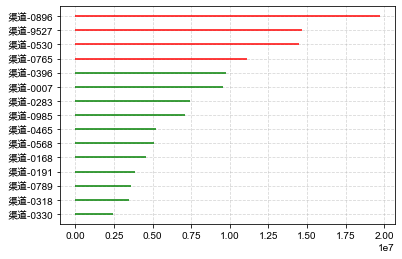

In [23]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.hlines(y=res.index, xmin=0, xmax=res['payment'],colors=res['colors'])
plt.grid(linestyle='--',alpha=0.5)

In [5]:
# 3.6.2 面积图：交易额差值排序

In [27]:
res['error'] = res['payment'] - res['payment'].mean()

In [31]:
res = res.sort_values('chanelID')

In [32]:
res

,payment,colors,error
chanelID,,,
渠道-0007,9.544331e+06,green,1.407480e+06
渠道-0168,4.560486e+06,green,-3.576366e+06
渠道-0191,3.849866e+06,green,-4.286986e+06
渠道-0283,7.444815e+06,green,-6.920371e+05
渠道-0318,3.450479e+06,green,-4.686373e+06
渠道-0330,2.409767e+06,green,-5.727085e+06
渠道-0396,9.738223e+06,green,1.601371e+06
渠道-0465,5.248341e+06,green,-2.888511e+06
渠道-0530,1.451162e+07,red,6.374771e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

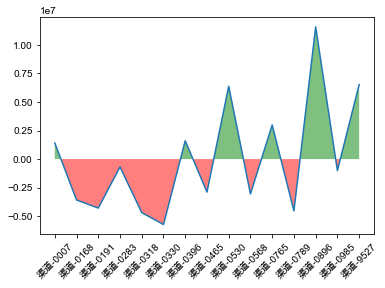

In [46]:
plt.plot(res['error'])
plt.fill_between(res.index,res['error'],0,where=res['error']>0,facecolor='green',interpolate=True,alpha='0.5')
plt.fill_between(res.index,res['error'],0,where=res['error']<0,facecolor='red',interpolate=True,alpha='0.5')
plt.xticks(rotation=45)